In [64]:
# Importo le librerie 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\massi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
# Leggo il data set in formato csv
data = pd.read_csv('C:/Users/massi/OneDrive/Desktop/data.csv')

In [66]:
# Info
data.info

<bound method DataFrame.info of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [67]:
# Columns
data.columns.values

array(['id', 'label', 'tweet'], dtype=object)

In [68]:
# Elimino la colonna id
del data['id']

In [69]:
# Dimensioni del data set
data.shape

(31962, 2)

In [70]:
data # display data 

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [71]:
# Text Preprocessing
''' Una volta importato il set di dati, il passo successivo è la preelaborazione del testo. Il testo può contenere numeri,
    caratteri speciali e spazi indesiderati. A seconda del problema da affrontare, può essere necessario o meno rimuovere i 
    caratteri speciali e i numeri dal testo. '''

import nltk
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

def Text_Preprocessing(X):
    stemmer = WordNetLemmatizer()
    documents = []

    for sen in range(0, len(X)):
        
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(X[sen])) 

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove number 
        document = re.sub('[\d.]', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I) 

        # Converting to Lowercase
        document = document.lower() 

        # Lemmatization
        document = document.split() # split di ogni parola presente nel documento corrente

        document = [stemmer.lemmatize(word) for word in document] # per ogni parola nel documento corrente applica lemmatize 
                                                                  # alla parola ES (gatti -> gatto)
        document = ' '.join(document) # unisce le singole parole del documento corrente tra 'parola_1, parola_2, ..., parola_n'
    
        documents.append(document)  # ['parola_1, parola_2,..., parola_n', 'parola_1, parola_2, parola_n', ... ]
                                    #  Primo documento                      Secondo documento              n-esimo documento  
            
    return documents # restituisce documents
    
X, y = data.tweet, data.label
documents = Text_Preprocessing(X)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\massi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [72]:
documents

['user when father is dysfunctional and is so selfish he drag his kid into his dysfunction run',
 'user user thanks for lyft credit can use cause they don offer wheelchair van in pdx disapointed getthanked',
 'bihday your majesty',
 'model love take with all the time in urð ð ð ð ð ð ð ð',
 'factsguide society now motivation',
 'huge fan fare and big talking before they leave chaos and pay dispute when they get there allshowandnogo',
 'user camping tomorrow user user user user user user user dannyâ',
 'the next school year is the year for exam ð can think about that ð school exam hate imagine actorslife revolutionschool girl',
 'we won love the land allin cavs champion cleveland clevelandcavaliers â',
 'user user welcome here m it so gr',
 'â ireland consumer price index mom climbed from previous to in may blog silver gold forex',
 'we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking value love',
 'i get to see my daddy today day 

In [73]:
# Converting Text to Numbers
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

# max_features=1500 -> utilizziamo le 1500 parole più ricorrenti come caratteristiche per addestrare il nostro classificatore
# min_df ->            includiamo solo le parole che compaiono in almeno 5 documenti
# max_df ->            dobbiamo includere solo le parole che compaiono in un massimo del 70% di tutti i documenti. 
                       # Le parole che ricorrono in quasi tutti i documenti di solito non sono adatte alla classificazione 
                       # perché non forniscono informazioni uniche sul documento
# infine, rimuoviamo le stop words dal nostro testo

#La funzione fit_transform della classe CountVectorizer converte i documenti di testo 
# in caratteristiche numeriche corrispondenti.

In [74]:
# Approccio Bag of Words ->  convertire il testo in numeri
# TFIDF -> Term frequency = (Number of Occurrences of a word)/(Total words in the document) mentre 
# IDF(word) = Log((Total number of documents)/(Number of documents containing the word))

# Il valore TFIDF per una parola in un particolare documento è più alto se la frequenza di occorrenza di 
# quella parola è più alta in quel documento specifico ma più bassa in tutti gli altri documenti

In [75]:
#TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [76]:
# Anche in questo modo si può opearare
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
# X = tfidfconverter.fit_transform(documents).toarray()


In [77]:
# Training and Testing Set

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
# Training Text Classification Model and Predicting Sentiment

In [80]:
# Fit Random Forest on Train set 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train) 

# n_estimators -> è il numero di alberi che si vuole costruire

RandomForestClassifier(random_state=0)

In [81]:
# Predict on Test set 
y_pred = classifier.predict(X_test)

In [82]:
# Evaluating the Model

In [83]:
# Accuracy Score 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
print(round(accuracy_score(y_test, y_pred),2) ) # 0.96

''' L'accuratezza è pari all'96%. 96 volte su 100 classifichiamo correttamente le osservazioni del test set '''

0.96


" L'accuratezza è pari all'96%. 96 volte su 100 classifichiamo correttamente le osservazioni del test set "

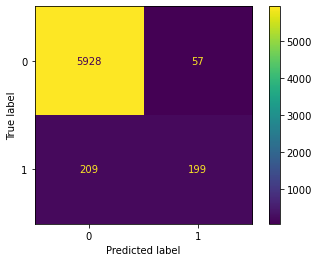

' 5928 -> TRUE NEGATIVE(Veri negativi) -> Persone non razziste correttamente classificate\n    199  -> TRUE POSITIVE(Veri positivi) -> Persone razziste correttamente classificate\n    57  -> FALSE POSITIVE(Falsi positivi) -> Persone classificate come razziste, ma in realtà esse\n    sono non non razziste\n    209  -> FALSE NEGATIVE(Falsi negativi) -> Persone classificate come non razziste, ma in realtà esse\n    sono razziste. '

In [85]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

# '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist

''' 5928 -> TRUE NEGATIVE(Veri negativi) -> Persone non razziste correttamente classificate
    199  -> TRUE POSITIVE(Veri positivi) -> Persone razziste correttamente classificate
    57  -> FALSE POSITIVE(Falsi positivi) -> Persone classificate come razziste, ma in realtà esse
    sono non non razziste
    209  -> FALSE NEGATIVE(Falsi negativi) -> Persone classificate come non razziste, ma in realtà esse
    sono razziste. ''' 

In [86]:
# Classification Report
print(classification_report(y_test, y_pred))

''' Precision(Precisione) = TRUE POSITIVE / (TRUE POSITIVE + FALSE POSITIVE)
    Recall(Sensitivity)   = TRUE POSITIVE / (TRUE POSITIVE + FALSE NEGATIVE)
    F1-Score              = 2 * ( (PRECISION * RECALL) / (PRECISION + RECALL) )'''

''' Il Random Forest implementato presenta una maggiore precisione e una maggiore sensitività per quanto 
    riguarda la classe 0, che rappresenta la classe dei tweet non razzisti, il discorso opposto può essere
    fatto per la classe 1 che rappresenta la classe dei tweet razzisti. Le prestazioni migliori del random forest 
    nei confronti della classe 0 sono da attribuire al forte sbilanciamento che esiste tra le classi di riferimento, 
    in particolare nel data set sono presenti in maggioranza tweet non razzisti, ciò condiziona il random forest. '''

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5985
           1       0.78      0.49      0.60       408

    accuracy                           0.96      6393
   macro avg       0.87      0.74      0.79      6393
weighted avg       0.95      0.96      0.95      6393



' Il Random Forest implementato presenta una maggiore precisione e una maggiore sensitività per quanto \n    riguarda la classe 0, che rappresenta la classe dei tweet non razzisti, il discorso opposto può essere\n    fatto per la classe 1 che rappresenta la classe dei tweet razzisti. Le prestazioni migliori del random forest \n    nei confronti della classe 0 sono da attribuire al forte sbilanciamento che esiste tra le classi di riferimento, \n    in particolare nel data set sono presenti in maggioranza tweet non razzisti, ciò condiziona il random forest. '

In [87]:
# Generate a Word Cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords, 
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1,
        collocations=False
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


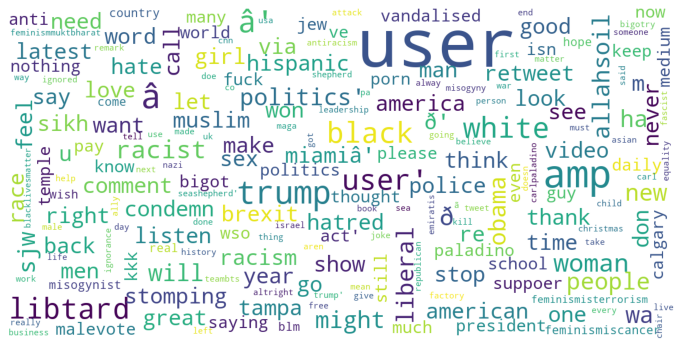

In [88]:
data_razzisti = data.tweet[data.label == 1].reset_index(drop = True)
show_wordcloud(Text_Preprocessing(data_razzisti)) # word cloud tweet razzisti

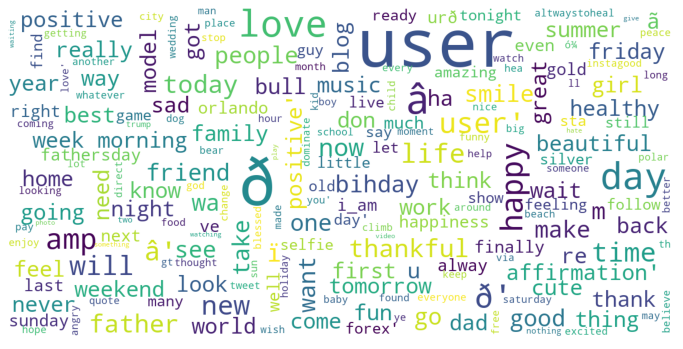

In [89]:
data_non_razzisti = data.tweet[data.label == 0].reset_index(drop = True)
show_wordcloud(Text_Preprocessing(data_non_razzisti)) # word cloud tweet non razzisti